In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import tools as t

In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
flights = pd.read_csv("flights.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
airlines = pd.read_csv("airlines.csv")

In [5]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
airports = pd.read_csv("airports.csv")

In [7]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [8]:
# flights['DepDate'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY,format='%Y%m%d')

In [9]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning DATA

In [10]:
for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] <= -3, 'Status'] = 0
    flights.loc[flights['ARRIVAL_DELAY'] >= -3, 'Status'] = 1
    flights.loc[flights['ARRIVAL_DELAY'] >= 39, 'Status'] = 2
    flights.loc[flights['DIVERTED'] == 1, 'Status'] = 3
    flights.loc[flights['CANCELLED'] == 1, 'Status'] = 4
    
    
#Cancellation cause
flights.loc[flights["CANCELLATION_REASON"] =="A", 'CANCELLATION_REASON'] = "0"
flights.loc[flights["CANCELLATION_REASON"] =="B", 'CANCELLATION_REASON'] = "1"
flights.loc[flights["CANCELLATION_REASON"] =="C", 'CANCELLATION_REASON'] = "2"
flights.loc[flights["CANCELLATION_REASON"] =="D", 'CANCELLATION_REASON'] = "3"

# dropping the unwanted data   
# flights = flights.drop("Unnamed: 0",1) #Empty
flights = flights.drop("YEAR",1) #Converted to date
flights = flights.drop("DAY",1) #Converted to date
flights = flights.drop("MONTH",1) #Converted to date
flights = flights.drop("DAY_OF_WEEK",1) #Converted to date
flights = flights.drop("DEPARTURE_TIME",1) #Of the departure data we only keep the expected 
flights = flights.drop("DEPARTURE_DELAY",1)
flights = flights.drop("ARRIVAL_TIME",1)
flights = flights.drop("SCHEDULED_TIME",1)
flights = flights.drop("ELAPSED_TIME",1)
flights = flights.drop("AIR_TIME",1)
flights = flights.drop("DIVERTED",1)
flights = flights.drop("CANCELLED",1)
flights = flights.drop("DISTANCE",1)
flights = flights.drop("FLIGHT_NUMBER",1)
flights = flights.drop("TAIL_NUMBER",1)

### Converting All columns to numaric value

In [11]:
for i in airlines.index:
    flights.AIRLINE.loc[flights[flights.AIRLINE == airlines.loc[i].IATA_CODE].index] = i
    
for i in airports.index:
    flights.ORIGIN_AIRPORT.loc[flights[flights.ORIGIN_AIRPORT == airports.loc[i].IATA_CODE].index] = i
    flights.DESTINATION_AIRPORT.loc[flights[flights.DESTINATION_AIRPORT == airports.loc[i].IATA_CODE].index] = i

C:\Users\Waqar_Shakeel\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ARRIVAL_DELAY_STATUS,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Status
0,6,17,277,5,21.0,15.0,404.0,4.0,430,-22.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,176,235,10,12.0,14.0,737.0,4.0,750,-9.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,278,66,20,16.0,34.0,800.0,11.0,806,5.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1,176,203,20,15.0,30.0,748.0,8.0,805,-9.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,6,277,17,25,11.0,35.0,254.0,5.0,320,-21.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6,121,277,500,10.0,506.0,551.0,5.0,605,-9.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048571,4,248,166,500,12.0,513.0,859.0,7.0,907,-1.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1048572,4,285,39,500,11.0,524.0,914.0,10.0,908,16.0,1,0,0,NaN,3.0,0.0,9.0,4.0,0.0,1.0
1048573,4,285,166,500,11.0,505.0,838.0,6.0,906,-22.0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [13]:
flights = flights.replace(np.nan,9)

In [14]:
Y = flights.Y.values

In [15]:
fl1 = flights.drop('Y', axis=1)

In [16]:
x = fl1.values

### Applying PCA for Dimension Reduction

In [17]:
pca = PCA()
principalComponents = pca.fit_transform(x)

#### Spliting into Test and Train

In [18]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)

#### Selecting Best Hyperparameters

In [19]:
maxi = -1
index = -1
for j in range(20):
    if(j == 0):
        continue
    clf = RandomForestClassifier(max_depth=j, random_state=0)
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    count = 0
    for i in range(len(p)):
        if(p[i] == y_test[i]):
            count = count + 1
    accu = count/len(p)
    if(maxi < accu):
        maxi = accu
        index = j
    print(j,count/len(p))

1 0.9121188279331474
2 0.9490642061845839
3 0.9898528955964047
4 0.9938201845361562
5 0.9985074982714637
6 0.9992847435805736
7 0.9996137615335098
8 0.9997520444412655
9 0.9998474119638557
10 0.9998664854683738
11 0.9998998641012803
12 0.9999284743580573
13 0.9999189376057983
14 0.9999141692296688
15 0.9999284743580573
16 0.9999284743580573
17 0.9999046324774098
18 0.9999141692296688
19 0.9999189376057983


In [20]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
p = clf.predict(X_test)
count = 0
for i in range(len(p)):
    if(p[i] ==y_test[i]):
        count = count + 1
print(count/len(p))

0.9999284743580573


In [22]:
t.print_confusion_matrix(p,y_test)

Predicted,0,1,2,3,All
Actual,,,,,
0,79427,0,0,12,79439
1,0,494,0,0,494
2,0,0,7286,0,7286
3,3,0,0,122493,122496
All,79430,494,7286,122505,209715


# Will flight arrive on time or not?

In [40]:
fl2 = flights.drop('ON_TIME', axis=1)

In [41]:
fl2

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ARRIVAL_DELAY_STATUS,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Status
0,6,17,277,5,21.0,15.0,404.0,4.0,430,-22.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0
1,1,176,235,10,12.0,14.0,737.0,4.0,750,-9.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0
2,2,278,66,20,16.0,34.0,800.0,11.0,806,5.0,1,0,9,9.0,9.0,9.0,9.0,9.0,1.0
3,1,176,203,20,15.0,30.0,748.0,8.0,805,-9.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0
4,6,277,17,25,11.0,35.0,254.0,5.0,320,-21.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6,121,277,500,10.0,506.0,551.0,5.0,605,-9.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0
1048571,4,248,166,500,12.0,513.0,859.0,7.0,907,-1.0,0,3,9,9.0,9.0,9.0,9.0,9.0,1.0
1048572,4,285,39,500,11.0,524.0,914.0,10.0,908,16.0,1,0,9,3.0,0.0,9.0,4.0,0.0,1.0
1048573,4,285,166,500,11.0,505.0,838.0,6.0,906,-22.0,0,3,9,9.0,9.0,9.0,9.0,9.0,0.0


In [42]:
x = fl2.values

In [43]:
Y = flights.ON_TIME.values

In [44]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)

In [46]:
maxi = -1
index = -1
for j in range(20):
    if(j == 0):
        continue
    clf = RandomForestClassifier(max_depth=j, random_state=0)
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    count = 0
    for i in range(len(p)):
        if(p[i] == y_test[i]):
            count = count + 1
    accu = count/len(p)
    if(maxi < accu):
        maxi = accu
        index = j
    print(j,count/len(p))

1 0.947848270271559
2 0.9850654459623776
3 0.9905919938964786
4 0.9964523281596452
5 0.9979257563836635
6 0.9986028657940539
7 0.9991416922966884
8 0.9994707102496245
9 0.9996280666618983
10 0.9997234341844885
11 0.9997615811935245
12 0.9998235700832082
13 0.9998474119638557
14 0.9998426435877262
15 0.9998617170922443
16 0.9998855589728918
17 0.9998807905967623
18 0.9999094008535393
19 0.9998903273490213


In [47]:
clf2 = RandomForestClassifier(max_depth=18, random_state=0)
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
p = clf2.predict(X_test)
count = 0
for i in range(len(p)):
    if(p[i] ==y_test[i]):
        count = count + 1
print(count/len(p))

0.9999094008535393


In [49]:
t.print_confusion_matrix(p,y_test) 

Predicted,0,1,All
Actual,,,
0,87203,16,87219
1,3,122493,122496
All,87206,122509,209715


# Will the flight arrival late before departure or not?

In [50]:
fl3 = flights.drop('ARRIVAL_DELAY_STATUS', axis=1)

In [51]:
x = fl2.values

In [52]:
Y = flights.ARRIVAL_DELAY_STATUS.values

In [53]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)

In [55]:
maxi = -1
index = -1
for j in range(20):
    if(j == 0):
        continue
    clf = RandomForestClassifier(max_depth=j, random_state=0)
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    count = 0
    for i in range(len(p)):
        if(p[i] == y_test[i]):
            count = count + 1
    accu = count/len(p)
    if(maxi < accu):
        maxi = accu
        index = j
    print(j,count/len(p))

1 0.9273299477862814
2 0.9747895954032854
3 0.990549078511313
4 0.996833798250006
5 0.9979829768972176
6 0.9987363803256801
7 0.9992513649476671
8 0.9994468683689769
9 0.9996137615335098
10 0.9997329709367475
11 0.9997949598264311
12 0.9998378752115967
13 0.9998474119638557
14 0.9998521803399852
15 0.9998664854683738
16 0.9998903273490213
17 0.9998712538445033
18 0.9998807905967623
19 0.9998855589728918


In [56]:
clf2 = RandomForestClassifier(max_depth=19, random_state=0)
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
p = clf2.predict(X_test)
count = 0
for i in range(len(p)):
    if(p[i] ==y_test[i]):
        count = count + 1
print(count/len(p))

0.9998903273490213


In [58]:
t.print_confusion_matrix(p,y_test)

Predicted,0,1,All
Actual,,,
0,130276,0,130276
1,23,79416,79439
All,130299,79416,209715


# Predict Value of Taxi Out on the basis of Taxi In (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt  # To visualize

In [322]:
Xw = fd.iloc[:, 13].values#.reshape(-1, 1)  # values converts it into a numpy array
Yw = fd.iloc[:, 18].values#.reshape(-1, 1)
d = fd.dropna()

Xw = d.iloc[:, 13].values#.reshape(-1, 1)  # values converts it into a numpy array
Yw = d.iloc[:, 18].values#.reshape(-1, 1)

# Xw = [3 if np.isnan(i) else i for i in Xw]
# Yw = [3 if np.isnan(i) else i for i in Yw]
Xw = np.array(Xw).reshape(-1,1)
Yw = np.array(Yw).reshape(-1,1)

In [323]:
X_trai, X_tes, y_trai, y_tes = train_test_split(Xw, Yw, test_size=0.2, random_state=0)

In [324]:
linear_regressor = LinearRegression() 
linear_regressor.fit(X_trai, y_trai)  
Y_pred = linear_regressor.predict(X_trai)

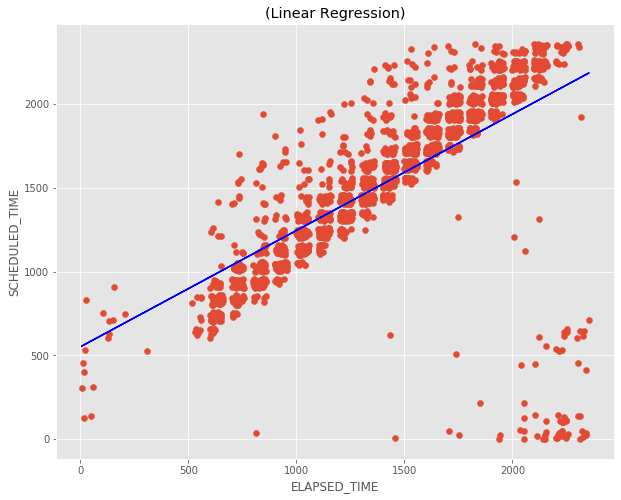

In [325]:
plt.scatter(X_trai, y_trai)
plt.plot(X_trai, Y_pred, color='b')
plt.title('(Linear Regression)')
plt.xlabel('ELAPSED_TIME')
plt.ylabel('SCHEDULED_TIME')
plt.show()
plt.show()

# Relation of Scheduled as Elapsed Time

In [326]:
d = fd.dropna()

Xz = d.iloc[:, 14].values#.reshape(-1, 1)  # values converts it into a numpy array
Yz = d.iloc[:, 15].values#.reshape(-1, 1)

# Xw = [3 if np.isnan(i) else i for i in Xw]
# Yw = [3 if np.isnan(i) else i for i in Yw]
Xz = np.array(Xz).reshape(-1,1)
Yz = np.array(Yz).reshape(-1,1)

In [327]:
X_trai, X_tes, y_trai, y_tes = train_test_split(Xz, Yz, test_size=0.2, random_state=0)

In [328]:
linear_regressor = LinearRegression() 
linear_regressor.fit(X_trai, y_trai)  
Y_pred = linear_regressor.predict(X_trai)

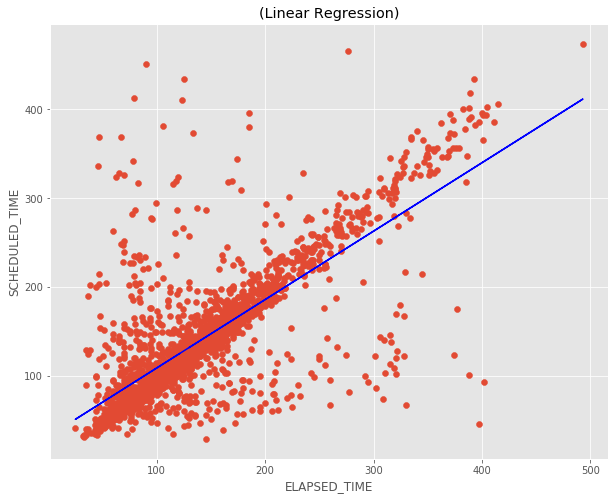

In [329]:
plt.scatter(X_trai, y_trai)
plt.plot(X_trai, Y_pred, color='b')
plt.title('(Linear Regression)')
plt.xlabel('ELAPSED_TIME')
plt.ylabel('SCHEDULED_TIME')
plt.show()

In [330]:
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_trai)
poly_reg.fit(X_poly,y_trai)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_trai)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

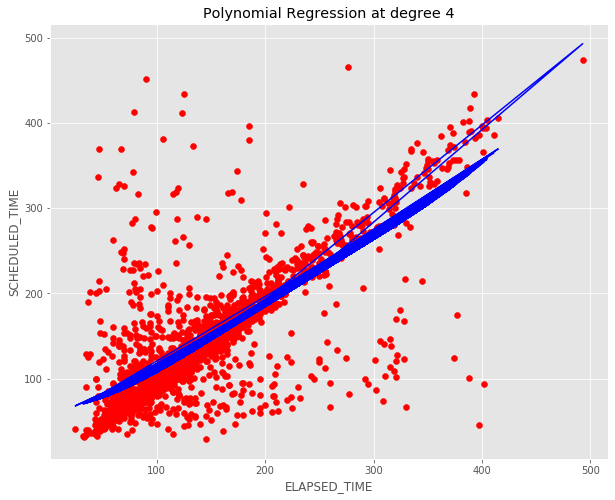

In [331]:
plt.scatter(X_trai,y_trai,color='red')
plt.plot(X_trai,lin_reg2.predict(poly_reg.fit_transform(X_trai)),color='blue')
plt.title('Polynomial Regression at degree 4')
plt.xlabel('ELAPSED_TIME')
plt.ylabel('SCHEDULED_TIME')
plt.show()

### Check with Different Degrees

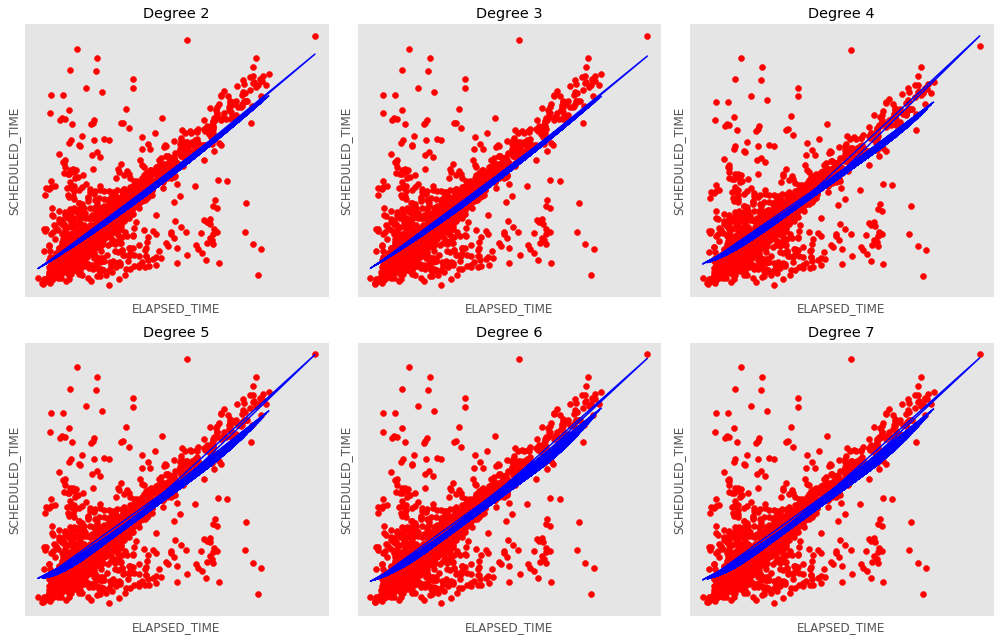

In [332]:
degrees = [2, 3, 4, 5, 6, 7]

plt.figure(figsize=(14, 9))
for i in range(len(degrees)):
    ax = plt.subplot(2, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_reg=PolynomialFeatures(degree=degrees[i])
    X_poly=poly_reg.fit_transform(X_trai)
    poly_reg.fit(X_poly,y_trai)
    lin_reg2=LinearRegression()
    lin_reg2.fit(X_poly,y_trai)

    plt.scatter(X_trai,y_trai,color='red')
    plt.plot(X_trai,lin_reg2.predict(poly_reg.fit_transform(X_trai)),color='blue')
    plt.title("Degree " + str(degrees[i]))
    plt.xlabel('ELAPSED_TIME')
    plt.ylabel('SCHEDULED_TIME')

plt.tight_layout()
plt.show()